<a href="https://colab.research.google.com/github/Surajit00007/Object-Detection-and-Segmentation-using-YOLOV8/blob/main/MLW2_LA6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Workshop 2 – CSE 2794
# LAB ASSIGNMENT-6:  Object Detection and Segmentation using YOLOV8
### Name-Surajit Sahoo
### Regd No. 2341019165
### Serial-38

In [ ]:
!pip install ultralytics
# Import necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
from PIL import Image

# Create output directory if it doesn't exist
os.makedirs('output_images', exist_ok=True)

### Task 1: Loading and Running YOLOv8 on an Image

Loading YOLOv8 model for object detection...

Performing object detection on images:
Processing image: /content/sample_data/sampleimage1.jpg

image 1/1 /content/sample_data/sampleimage1.jpg: 448x640 16 persons, 1 car, 2 motorcycles, 1 truck, 2 handbags, 194.7ms
Speed: 4.2ms preprocess, 194.7ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


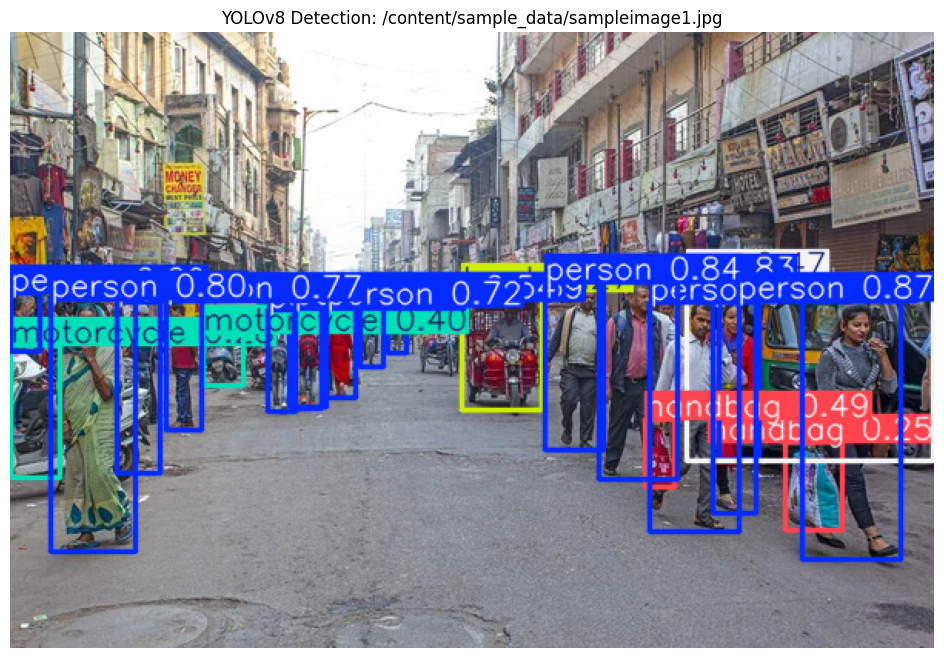

Saved detection results to output_images/detection_sampleimage1.jpg
Detected objects:
  16 persons
  1 car
  2 motorcycles
  1 truck
  2 handbags

Processing image: /content/sample_data/sampleimage2.jpg

image 1/1 /content/sample_data/sampleimage2.jpg: 448x640 24 persons, 148.1ms
Speed: 5.3ms preprocess, 148.1ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


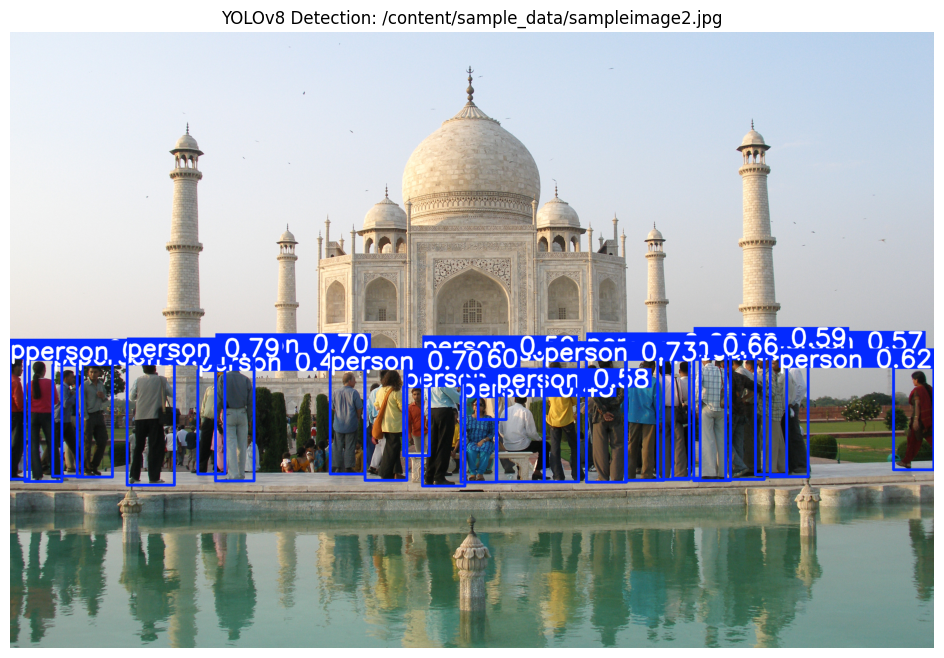

Saved detection results to output_images/detection_sampleimage2.jpg
Detected objects:
  24 persons

Processing image: /content/sample_data/sampleimage3.jpg

image 1/1 /content/sample_data/sampleimage3.jpg: 448x640 1 dog, 325.3ms
Speed: 3.9ms preprocess, 325.3ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


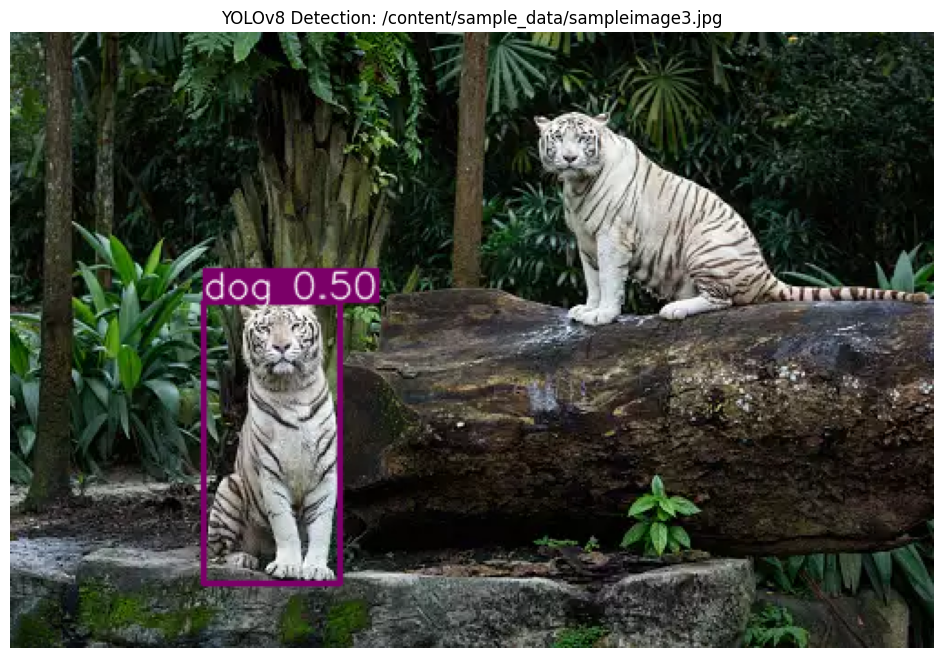

Saved detection results to output_images/detection_sampleimage3.jpg
Detected objects:
  1 dog



In [ ]:
# Step 1: Install the ultralytics library (uncomment if needed)
# !pip install ultralytics

# Step 2: Load the pre-trained YOLOv8 object detection model
print("Loading YOLOv8 model for object detection...")
model_detection = YOLO('yolov8n.pt')  # Using the nano version, can use larger models like 'yolov8s.pt' or 'yolov8m.pt'

# Step 3: Function to run inference on images
def detect_objects(image_path, conf_threshold=0.25):
    """
    Performs object detection on an image using YOLOv8

    Args:
        image_path: Path to the input image
        conf_threshold: Confidence threshold for detection

    Returns:
        Original image with bounding boxes
    """
    # Run inference on the image
    results = model_detection(image_path, conf=conf_threshold)

    # Plot results
    for r in results:
        im_array = r.plot()  # Plot with bounding boxes
        im = Image.fromarray(im_array[..., ::-1])  # RGB to BGR for display

    return im, results[0]

# Step 4: List of sample images to process
sample_images = [
    '/content/sample_data/sampleimage1.jpg',
    '/content/sample_data/sampleimage2.jpg',
    '/content/sample_data/sampleimage3.jpg'
]
# Step 5: Process each image and display/save results
print("\nPerforming object detection on images:")
for i, img_path in enumerate(sample_images):
    try:
        print(f"Processing image: {img_path}")

        # Perform detection
        output_img, results = detect_objects(img_path)

        # Display results
        plt.figure(figsize=(12, 8))
        plt.imshow(output_img)
        plt.axis('off')
        plt.title(f'YOLOv8 Detection: {img_path}')
        plt.show()

        # Save output image
        output_path = f'output_images/detection_{os.path.basename(img_path)}'
        output_img.save(output_path)
        print(f"Saved detection results to {output_path}")

        # Print detected objects
        print("Detected objects:")
        for c in results.boxes.cls.unique():
            n = (results.boxes.cls == c).sum()
            class_name = results.names[int(c)]
            print(f"  {n} {class_name}{'s' if n > 1 else ''}")
        print()

    except Exception as e:
        print(f"Error processing {img_path}: {e}")

### Task 2: Instance Segmentation using YOLOv8 on an Image


Loading YOLOv8 model for instance segmentation...

Performing instance segmentation on images:
Processing image for segmentation: /content/sample_data/sampleimage1.jpg

image 1/1 /content/sample_data/sampleimage1.jpg: 448x640 15 persons, 1 car, 2 motorcycles, 1 bus, 2 umbrellas, 1 handbag, 461.7ms
Speed: 4.1ms preprocess, 461.7ms inference, 136.5ms postprocess per image at shape (1, 3, 448, 640)


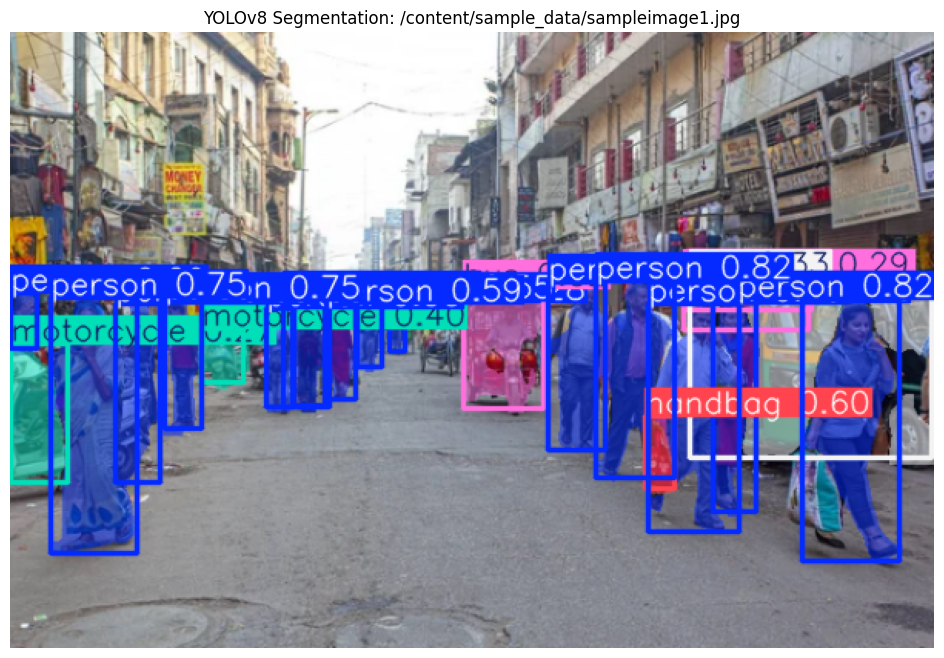

Saved segmentation results to output_images/segmentation_sampleimage1.jpg
Segmented objects:
  15 persons
  1 car
  2 motorcycles
  1 bus
  2 umbrellas
  1 handbag

Processing image for segmentation: /content/sample_data/sampleimage2.jpg

image 1/1 /content/sample_data/sampleimage2.jpg: 448x640 24 persons, 424.0ms
Speed: 11.9ms preprocess, 424.0ms inference, 288.5ms postprocess per image at shape (1, 3, 448, 640)


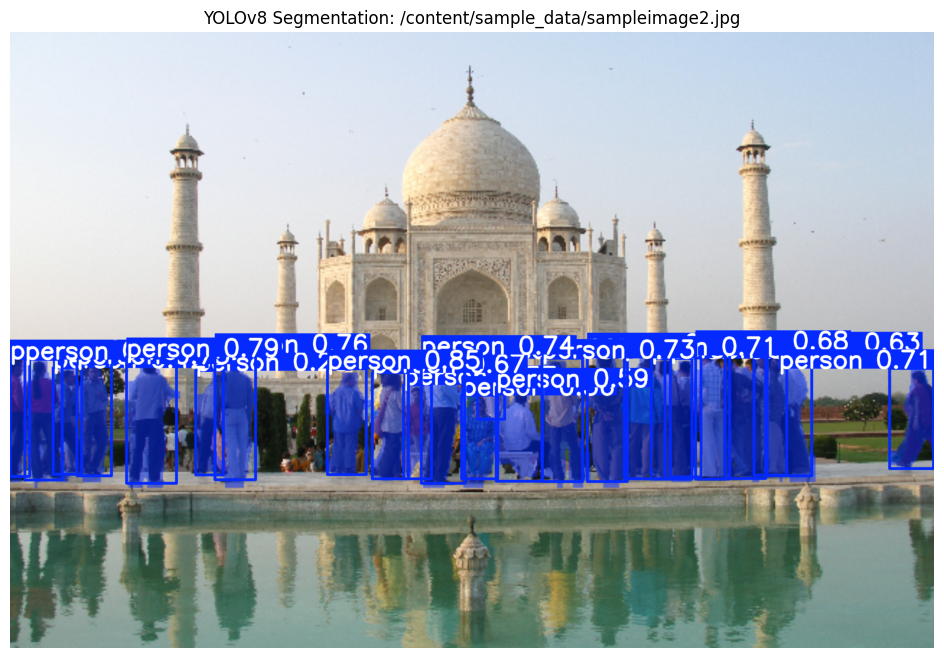

Saved segmentation results to output_images/segmentation_sampleimage2.jpg
Segmented objects:
  24 persons

Processing image for segmentation: /content/sample_data/sampleimage3.jpg

image 1/1 /content/sample_data/sampleimage3.jpg: 448x640 2 cats, 454.7ms
Speed: 3.9ms preprocess, 454.7ms inference, 12.4ms postprocess per image at shape (1, 3, 448, 640)


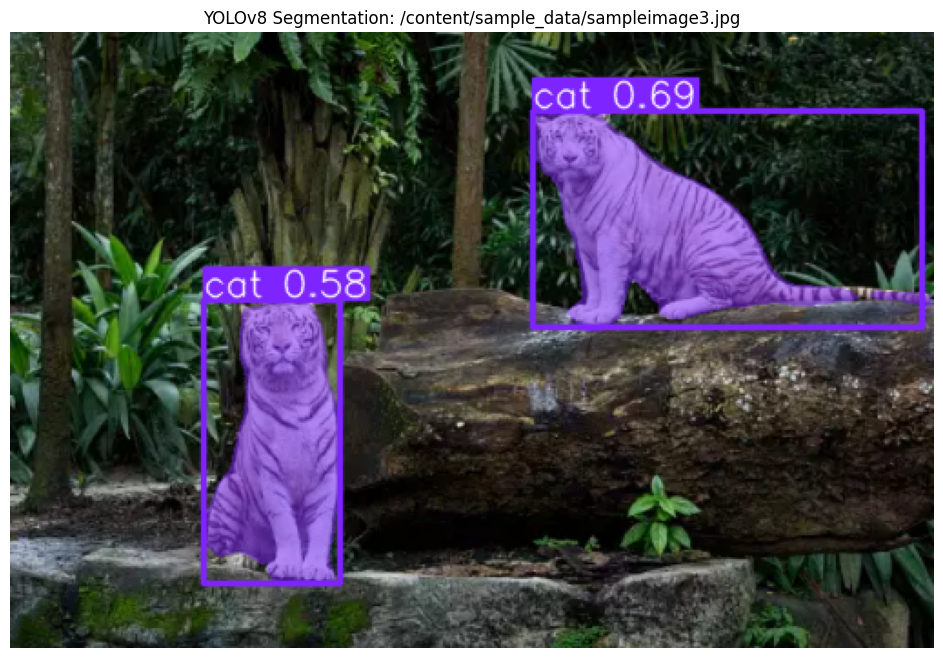

Saved segmentation results to output_images/segmentation_sampleimage3.jpg
Segmented objects:
  2 cats


Lab assignment completed successfully!


In [ ]:
# Step 1: Load the pre-trained YOLOv8 segmentation model
print("\nLoading YOLOv8 model for instance segmentation...")
model_segmentation = YOLO('yolov8n-seg.pt')  # Using the nano version, can use larger models like 'yolov8s-seg.pt'

# Step 2: Function to perform instance segmentation
def segment_objects(image_path, conf_threshold=0.25):
    """
    Performs instance segmentation on an image using YOLOv8

    Args:
        image_path: Path to the input image
        conf_threshold: Confidence threshold for segmentation

    Returns:
        Original image with segmentation masks
    """
    # Run segmentation on the image
    results = model_segmentation(image_path, conf=conf_threshold)

    # Plot results
    for r in results:
        im_array = r.plot()  # Plot with segmentation masks
        im = Image.fromarray(im_array[..., ::-1])  # RGB to BGR for display

    return im, results[0]

# Step 3: Process each image for segmentation and display/save results
print("\nPerforming instance segmentation on images:")
for i, img_path in enumerate(sample_images):
    try:
        print(f"Processing image for segmentation: {img_path}")

        # Perform segmentation
        output_img, results = segment_objects(img_path)

        # Display results
        plt.figure(figsize=(12, 8))
        plt.imshow(output_img)
        plt.axis('off')
        plt.title(f'YOLOv8 Segmentation: {img_path}')
        plt.show()

        # Save output image
        output_path = f'output_images/segmentation_{os.path.basename(img_path)}'
        output_img.save(output_path)
        print(f"Saved segmentation results to {output_path}")

        # Print segmented objects
        print("Segmented objects:")
        if hasattr(results, 'masks') and results.masks is not None:
            for c in results.boxes.cls.unique():
                n = (results.boxes.cls == c).sum()
                class_name = results.names[int(c)]
                print(f"  {n} {class_name}{'s' if n > 1 else ''}")
        else:
            print("  No objects segmented")
        print()

    except Exception as e:
        print(f"Error processing {img_path} for segmentation: {e}")

# Additional visualization: show masks individually for better understanding
def visualize_segmentation_masks(image_path):
    """
    Visualizes individual segmentation masks for each detected object
    """
    # Load image
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Run segmentation
    results = model_segmentation(image_path)
    result = results[0]

    # Check if masks are available
    if hasattr(result, 'masks') and result.masks is not None:
        # Get the number of detected objects
        num_masks = len(result.masks)

        if num_masks > 0:
            # Create a figure with subplots
            fig, axes = plt.subplots(1, num_masks + 1, figsize=(15, 5))

            # Show original image
            axes[0].imshow(original_image)
            axes[0].set_title('Original Image')
            axes[0].axis('off')

            # Show each mask
            for i in range(num_masks):
                mask = result.masks[i].data[0].cpu().numpy()

                # Create a colored mask
                colored_mask = np.zeros_like(original_image)
                color = np.random.randint(0, 256, (3,))
                for c in range(3):
                    colored_mask[:, :, c] = mask * color[c]

                # Overlay mask on original image
                overlay = original_image.copy()
                cv2.addWeighted(colored_mask, 0.5, overlay, 1 - 0.5, 0, overlay)

                # Display in subplot
                axes[i+1].imshow(overlay)
                class_id = int(result.boxes[i].cls)
                class_name = result.names[class_id]
                confidence = result.boxes[i].conf.item()
                axes[i+1].set_title(f'{class_name}: {confidence:.2f}')
                axes[i+1].axis('off')

            plt.tight_layout()
            plt.show()
        else:
            print("No masks were detected in the image.")
    else:
        print("No masks available for this result.")

print("\nLab assignment completed successfully!")